In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
ab_test_data = pd.read_csv("ab_test_data.csv")

In [3]:
ab_test_data.head()

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control


In [5]:
ab_test_data["customer_segmnt"].value_counts()

customer_segmnt
treatment    9987
control      9973
Name: count, dtype: int64

In [6]:
q99 = ab_test_data["watch_time_hrs"].quantile(0.999)
ab_test_data_no_out = ab_test_data[~(ab_test_data["watch_time_hrs"]>q99)]

In [9]:
ab_test_data["watch_time_hrs"].quantile(0.999)

np.float64(18.820564534093776)

In [10]:
ab_test_data_no_out.shape

(19940, 5)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25260\3581199807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ab_test_data_no_out["watch_time_hrs"], bins=25)


<Axes: xlabel='watch_time_hrs', ylabel='Density'>

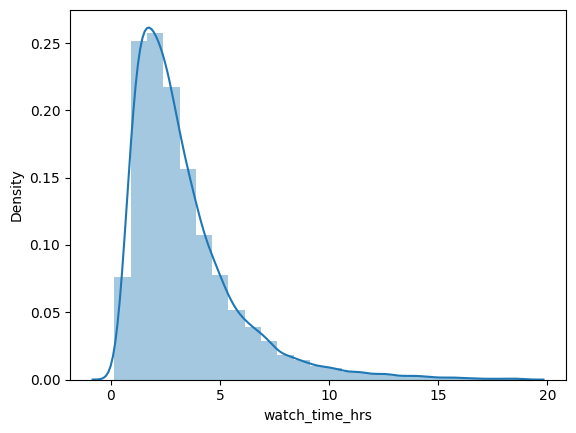

In [12]:
sns.distplot(ab_test_data_no_out["watch_time_hrs"], bins=25)

In [13]:
ab_test_data_no_out["log_watch_time_hrs"] = np.log(ab_test_data_no_out["watch_time_hrs"])

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25260\4234784322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_test_data_no_out["log_watch_time_hrs"] = np.log(ab_test_data_no_out["watch_time_hrs"])


C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_25260\664101167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ab_test_data_no_out["log_watch_time_hrs"], bins=25)


<Axes: xlabel='log_watch_time_hrs', ylabel='Density'>

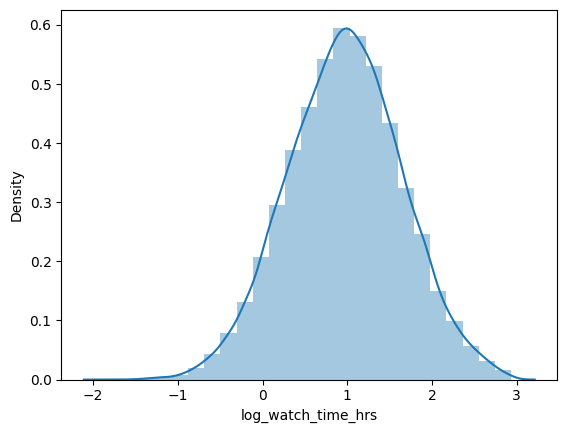

In [14]:
sns.distplot(ab_test_data_no_out["log_watch_time_hrs"], bins=25)

In [16]:
ab_test_data_no_out.groupby("customer_segmnt")["watch_time_hrs"].mean()

customer_segmnt
control      3.583722
treatment    3.047443
Name: watch_time_hrs, dtype: float64

In [17]:
ab_test_control_data = ab_test_data_no_out[ab_test_data_no_out["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data_no_out[ab_test_data_no_out["customer_segmnt"] == "treatment"]

In [ ]:
ab_test_control_data["watch_time_hrs"].mean() - ab_test_treatment_data["watch_time_hrs"].mean()

np.float64(0.5362798985684281)

In [24]:
stats.ttest_ind(ab_test_treatment_data["watch_time_hrs"], ab_test_control_data["watch_time_hrs"], alternative="less")

TtestResult(statistic=np.float64(-15.747920984759455), pvalue=np.float64(7.672352845683174e-56), df=np.float64(19938.0))

### Now we can make decision ->
here our p value is very less then our significance value(alpha = 0.05)

we know that if p value <= significance value then reject the null hypothesis 